# Image Processing SS 16 - Assignment - 04

### Deadline is 17.5.2016 at 16:00 o'clock

Please solve the assignments together with a partner.
I will run every notebook. Make sure the code runs through. Select `Kernel` -> `Restart & Run All` to test it.
Please strip the output from the cells, either select `Cell` -> `All Output` -> `Clear` or use the `nb_strip_output.py` script / git hook.

In [1]:
# display the plots inside the notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from skimage.color import rgb2grey
try:
    import urllib.request as urllib2
except ImportError:
    import urllib2

import random
try:
    from StringIO import StringIO as BytesIO
except ImportError:
    from io import BytesIO
    
from PIL import Image

pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

# Exercise 1 - Qualify sharpness and noise - 5 Points

Qualify the noise and sharpness in the images. Make a plot images, noise

In [3]:
# Load the pictures here
sample_images = []
direc = 'misc/' # directory of the sample pictures realtivly to your notebook
for number in [1,3,5,6]:
    sample_images.append(
        np.array(Image.open(direc+'4.2.0'+str(number)+'.tiff'))
    )
for name in ['house']:
    sample_images.append(
        np.array(Image.open(direc+name+'.tiff'))
    )

<Container object of 5 artists>

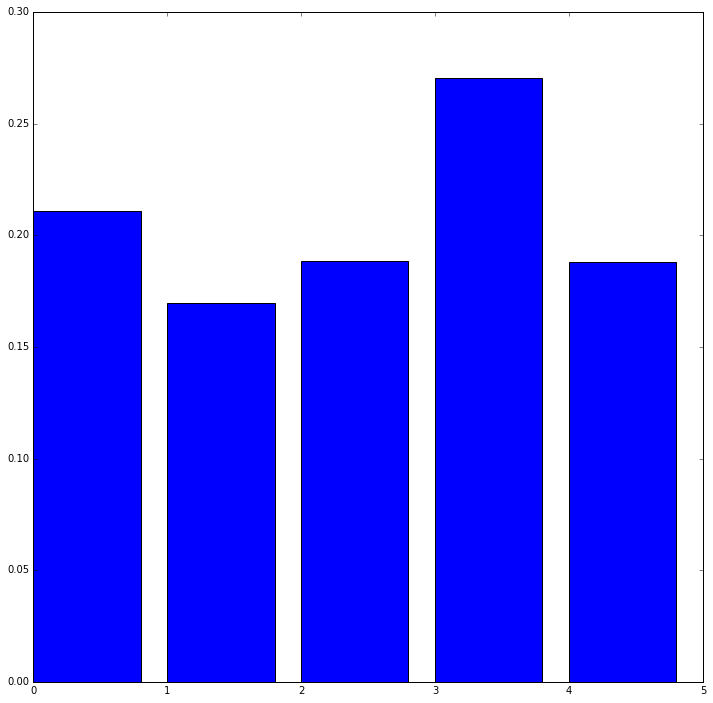

In [4]:
def calc_mue(img):
    number_of_pixels = img.shape[0] * img.shape[1]
    img_sum = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            img_sum += img[x,y]
    return img_sum/number_of_pixels

def calc_sigma(img):
    mue = calc_mue(img)
    number_of_pixels = img.shape[0] * img.shape[1]
    img_sum = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            img_sum += ((img[x,y] - mue) ** 2)
    return np.sqrt(img_sum/number_of_pixels)

def qualify_noise(img):
    """Qualify the noise based on the std of a gaussian model.
       You may find a window that is contant in the images.
    """
    return calc_sigma(rgb2grey(img))
#qualify_noise(sample_images[5])

plt.bar(range(len(sample_images)), [qualify_noise(i) for i in sample_images])

<Container object of 5 artists>

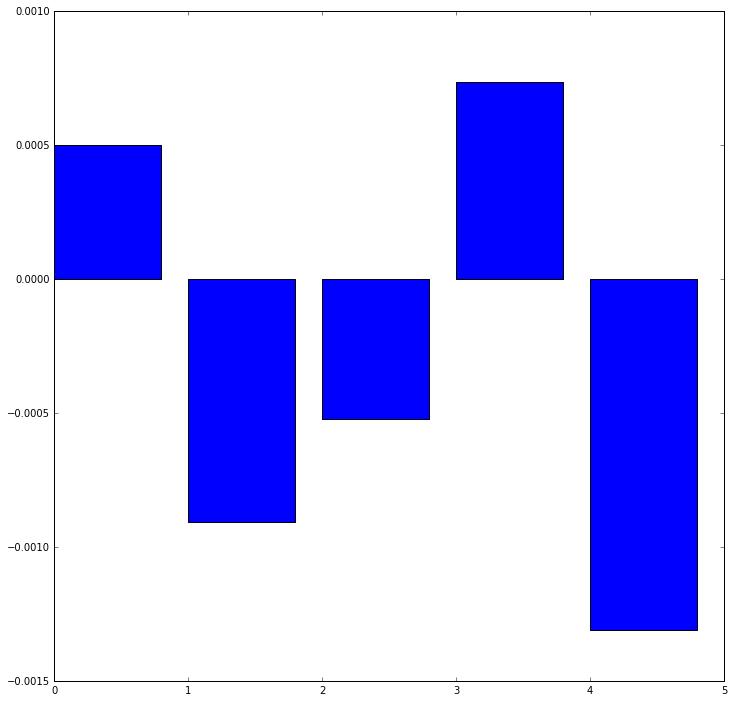

In [5]:
def calc_d(img):
    number_of_pixels = img.shape[0] * img.shape[1]
    img_sum = 0
    for y in range(img.shape[1]):
        for x in range(1, img.shape[0]):
            img_sum += (img[x, y] - img[x - 1, y])
    return img_sum/number_of_pixels

def qualify_sharpness(img):
    """Qualify the sharpness based on the average pixel differences."""
    return calc_d(rgb2grey(img))

plt.bar(range(len(sample_images)), [qualify_sharpness(i) for i in sample_images])

Does the result match the expectations? If not what processing step can be done?/

# Exercise 2 - SSIM JPEG Compression - 5 Points

In [6]:
def jpeg_enocde(img, quality):
    pil_img = Image.fromarray(img)
    buffer = BytesIO()
    pil_img.save(buffer, "JPEG", quality=quality)
    return buffer

def jpeg_decode(buffer):
    img = Image.open(buffer)
    return np.array(img)

def jpeg_quality_filter(img, quality):
    as_jpeg = jpeg_enocde(img, quality)
    return jpeg_decode(as_jpeg)

In [7]:
images_for_jpeg = sample_images[3::]
len(images_for_jpeg)

2

In [8]:
images10 = [jpeg_quality_filter(img, 10) for img in sample_images]
images50 = [jpeg_quality_filter(img, 50) for img in sample_images]
images80 = [jpeg_quality_filter(img, 80) for img in sample_images]

0
0.992364141045
0.997829639072
0.998759167195


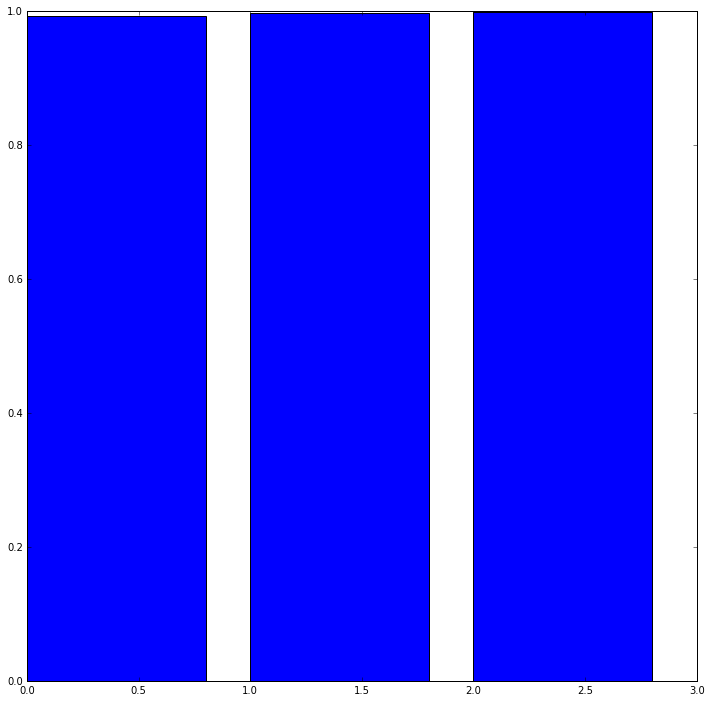

1
0.912685000847
0.971871738943
0.989525973076


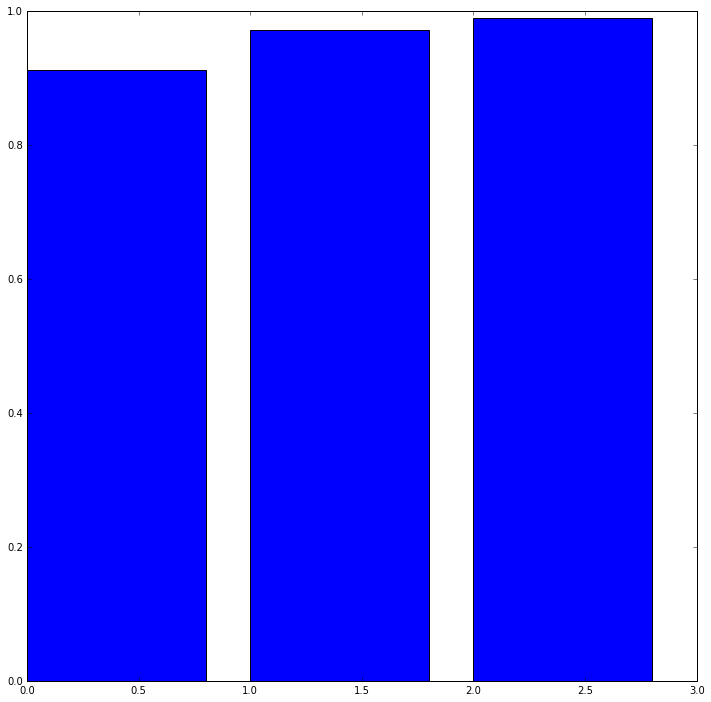

2
0.983822503033
0.996000418425
0.998064422037


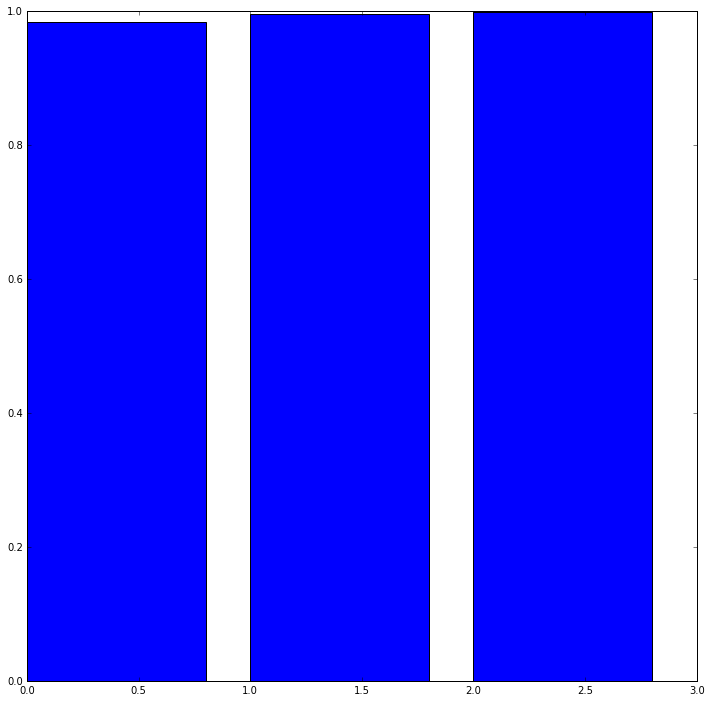

3
0.987382695431
0.995477575927
0.997329379088


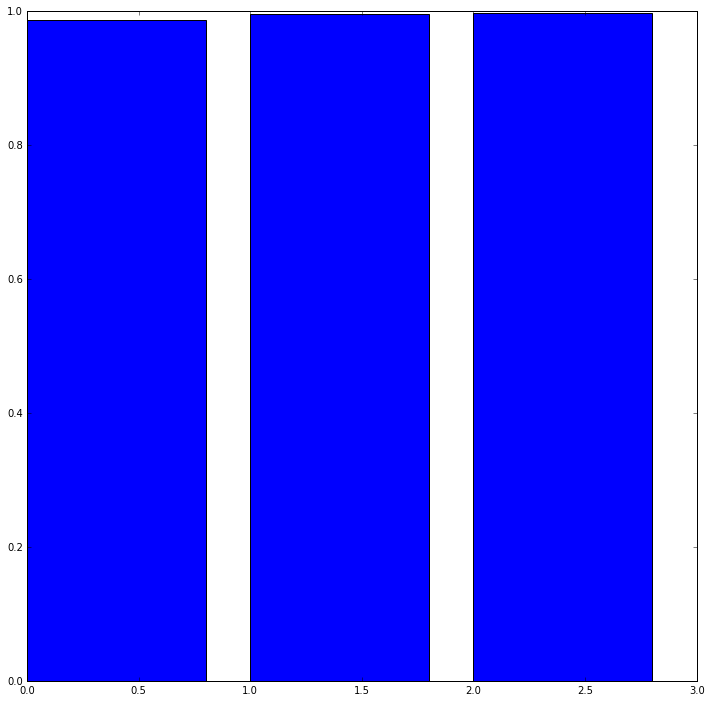

4
0.976244553349
0.993775431681
0.997232396509


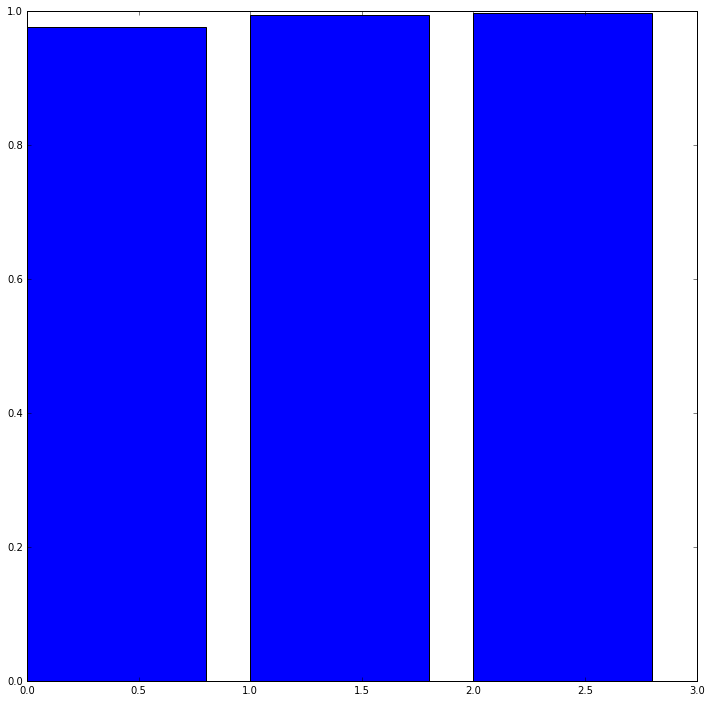

In [9]:
def calc_global_sigma(img, filtered_img, mue_img, mue_filtered_img):
        number_of_pixels = img.shape[0] * img.shape[1] - 1
        img_sum = 0
        for x in range(img.shape[0]):
            for y in range(img.shape[1]):
                img_sum += (img[x,y] - mue_img) * (filtered_img[x,y] - mue_filtered_img)
        return img_sum/number_of_pixels

def ssim(img, filtered_img):
    """The SSIM similarity measure. Use the parameters from the paper
    as on the second to last slide from the lecture"""
    img = rgb2grey(img)
    filtered_img = rgb2grey(filtered_img)
    
    mue_img = calc_mue(img)
    mue_filtered_img = calc_mue(filtered_img)
    const_lum = (0.000002*255) ** 2
    const_cont = (0.000001*255) ** 2
    
    num1 = 2 * mue_img * mue_filtered_img + const_lum
    num2 = 2 * calc_global_sigma(img, filtered_img, mue_img, mue_filtered_img) + const_cont
    denom1 = mue_img ** 2 + mue_filtered_img ** 2 + const_lum
    denom2 = calc_sigma(img) ** 2 + calc_sigma(filtered_img) ** 2 + const_cont
    print((num1 * num2)/(denom1 * denom2))
    return float((num1 * num2)/(denom1 * denom2))

for i, img in enumerate(sample_images):
    print(i)
    compressed_images = [images10[i], images50[i], images80[i]]
    plt.bar(range(len(compressed_images)),
            [ssim(img, comp) for comp in compressed_images])
    plt.show()